#**Использование маски и срезов одновременно**

In [1]:
import numpy as np

users = np.array(['Андрей', 'Иван', 'Николай', 'Александр', 'Андрей'])
visits = np.array([
                   [1, 2, 1, 0, 0, 1, 1],
                   [0, 0, 1, 0, 3, 1, 2],
                   [2, 1, 0, 2, 0, 2, 1],
                   [1, 2, 1, 0, 1, 1, 1],
                   [1, 2, 1, 0, 0, 1, 0]
])

In [2]:
mask = users == 'Андрей'

In [4]:
visits[mask]

array([[1, 2, 1, 0, 0, 1, 1],
       [1, 2, 1, 0, 0, 1, 0]])

**В скобках можно работать и с маской и с индексами одновременно!**



In [3]:
visits[mask, 5:]

array([[1, 1],
       [1, 0]])

In [6]:
mask = users != 'Андрей'
mask

array([False,  True,  True,  True, False])

In [7]:
visits[mask]

array([[0, 0, 1, 0, 3, 1, 2],
       [2, 1, 0, 2, 0, 2, 1],
       [1, 2, 1, 0, 1, 1, 1]])

In [8]:
visits[mask][:5]

array([[0, 0, 1, 0, 3, 1, 2],
       [2, 1, 0, 2, 0, 2, 1],
       [1, 2, 1, 0, 1, 1, 1]])

In [10]:
visits[mask, :5]

array([[0, 0, 1, 0, 3],
       [2, 1, 0, 2, 0],
       [1, 2, 1, 0, 1]])

In [13]:
mask = users == 'Андрей'
mask

array([ True, False, False, False,  True])

Если вы хотите выполнить инверсию булевых значений(True заменить на False, а False на True), то не стоит использовать команду not. Для этого есть знак ~ (тильда).

In [14]:
~mask

array([False,  True,  True,  True, False])

In [17]:
andrey_not_visits = visits[~mask]
andrey_not_visits

array([[0, 0, 1, 0, 3, 1, 2],
       [2, 1, 0, 2, 0, 2, 1],
       [1, 2, 1, 0, 1, 1, 1]])

**без использования Numpy**

In [18]:
users = ['Андрей', 'Иван', 'Николай', 'Александр', 'Андрей']
visits = [
          [1, 2, 1, 0, 0, 1, 1],
          [0, 0, 1, 0, 3, 1, 2],
          [2, 1, 0, 2, 0, 2, 1],
          [1, 2, 1, 0, 1, 1, 1],
          [1, 2, 1, 0, 0, 1, 0]
]

Вывести все записи посетителей, кроме Андрея, по будням

In [22]:
mask = list()
for i, user in enumerate(users):
    if user != 'Андрей':
        mask.append(i)

for j, week in enumerate(visits):
    if j in mask:
        print(week[:5])

[0, 0, 1, 0, 3]
[2, 1, 0, 2, 0]
[1, 2, 1, 0, 1]


**Работа с Numpy гораздо проще и быстрее!**

#**Булевы операции**

In [23]:
users = np.array(['Андрей', 'Иван', 'Николай', 'Александр', 'Андрей'])
visits = np.array([
                   [1, 2, 1, 0, 0, 1, 1],
                   [0, 0, 1, 0, 3, 1, 2],
                   [2, 1, 0, 2, 0, 2, 1],
                   [1, 2, 1, 0, 1, 1, 1],
                   [1, 2, 1, 0, 0, 1, 0]
])

In [25]:
mask1 = users == 'Александр'
mask2 = users == 'Иван'
mask1, mask2 

(array([False, False, False,  True, False]),
 array([False,  True, False, False, False]))

| - or

& - and

In [26]:
mask = mask1 | mask2
mask

array([False,  True, False,  True, False])

In [27]:
mask = (users == 'Иван') | (users == 'Александр')
mask

array([False,  True, False,  True, False])

In [28]:
~mask

array([ True, False,  True, False,  True])

#**Прихотливая индексация**

In [31]:
m2d = np.array([np.full(4, x) for x in range(1, 6)])
m2d

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4],
       [5, 5, 5, 5]])

In [32]:
m2d[[0, 2, 4]]

array([[1, 1, 1, 1],
       [3, 3, 3, 3],
       [5, 5, 5, 5]])

In [33]:
m2d[[4, 0, 2]]

array([[5, 5, 5, 5],
       [1, 1, 1, 1],
       [3, 3, 3, 3]])

In [35]:
m2d = np.array([np.arange(x, x + 4) for x in range(1, 18, 4)])
m2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [36]:
m2d[[0, 2, 4]]

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12],
       [17, 18, 19, 20]])

In [37]:
m2d[[0, 2, 4], [1, 2, 3]]

array([ 2, 11, 20])

In [39]:
m2d[[0, 2, 4]][:, 1:4]

array([[ 2,  3,  4],
       [10, 11, 12],
       [18, 19, 20]])

In [40]:
m2d[[0, 2, 4]][:, [1, 2, 3]]

array([[ 2,  3,  4],
       [10, 11, 12],
       [18, 19, 20]])

#**Изменение формы массива. Функция reshape**

In [41]:
m1 = np.arange(50)
m1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [42]:
m1.reshape(5, 10)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [50]:
m1.reshape(2, 5, 5)

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]],

       [[25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49]]])

**На вход функции подается двумерный массив:**



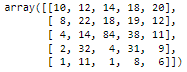

доработайте функцию так чтобы она вернула маску по которой потом можно будет выбрать значения меньше 20 или больше 40.

In [59]:
import numpy as np

def solution(arr):
    mask = (arr < 20) | (arr > 40)
    return mask

arr = np.random.randint(0, 60, (5, 5))
print(arr)
print(solution(arr))

[[43 25 51 57  4]
 [20 40 58  1 41]
 [35  1 33 17 50]
 [26 29 22 37 31]
 [37 49  1 52 18]]
[[ True False  True  True  True]
 [False False  True  True  True]
 [False  True False  True  True]
 [False False False False False]
 [False  True  True  True  True]]


In [60]:
len(arr)

5

**На вход функции подается двумерный массив.доработайте функцию так чтобы она вернула значения, которые лежат на главной диагонали. Значения должны быть в одномерном массиве (Для особых знатоков: функцией diag не пользоваться!). Работайте с прихотливой индексацией.**



In [62]:
import numpy as np

def get_diag(arr):
    indx = np.arange(len(arr))
    return arr[indx, indx]

arr = np.random.randint(0, 20, (5, 5))
print(arr)
get_diag(arr)

[[ 5  6 18  9 16]
 [ 2  3 19 14  0]
 [ 5 18 10 12  8]
 [13  8 15  2  6]
 [ 0 14 13  1 10]]


array([ 5,  3, 10,  2, 10])

**На вход функции подается двумерный массив. Доработайте функцию так чтобы она вернула значения, которые лежат на побочной диагонали.**



In [64]:
import numpy as np

def solution(arr):
    indx = np.arange(len(arr))
    return arr[indx[::-1], indx]

arr = np.random.randint(0, 20, (5, 5))
print(arr)
solution(arr)

[[10  2  9  5  8]
 [ 4 14  6  0 12]
 [ 5 10  3 12 17]
 [ 0 14  1  3  8]
 [17  8 17  9 17]]


array([17, 14,  3,  0,  8])